<div >
<img src = "figs/dsa_banner.png" />
</div>

# Primera entrega

### Integrantes:
    - Catalina García García
    - Camilo Alejandro Grande Sánchez
    - Jesús Alberto Parada Pérez
    - Jorge Esteban Caballero Rodríguez


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.impute import SimpleImputer
from pca import pca
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import ppscore as pps

import warnings
warnings.filterwarnings("ignore")

**Descripción  de la información:**

La fundación "Future Education" (se modifica el nombre real por confidencialidad) tiene como objetivo incentivar practicas de innovación en la educación colombiana. 

Uno de los instrumentos que implementa en sus proyectos es una encuesta que busca medir las competencias que tienen maestros/docentes/agentes educativos y que son fundamentales para mejorar la calidad de la educación.

Las *Competencias del Siglo XXI* es una adaptación del capitulo latinoamericano del proyecto ATC21s por sus siglas en ingles *"Assessment and Teaching of 21 st Century Skills"* de la Fundación Omar Dengo. Este instrumento consta de 20 preguntas asociadas a 5 competencias: 

1. Creatividad e innovación
1. Pensamiento crítico
1. Resolución de problemas.
1. Comunicación.
1. Trabajo colaborativo.

Se carga la base de datos que tiene 5270 observaciones y 33 variables, y la codificación de las 20 preguntas. Dentro de las 20 preguntas se encuentran 9 preguntas invertidas (es decir, preguntas que "más es menos", dónde la respuesta más alta es el peor valor)

## Carga de datos

Se cargan los datos de las fuentes dadas:

In [2]:
def cargar_datos(filename, nombre_base):
    print("--------------------------------------------------------")
    print(nombre_base)
    data = pd.read_excel(f"data/{filename}")
    display(data)
    return data


data = cargar_datos("Base perfilación de competencias_310823.xlsx", "Base de datos:")    
df_preguntas = cargar_datos("Base codificacion preguntas.xlsx", "Base de preguntas:")    


## Lista de las columnas en la base de datos
print("--------------------------------------------------------")
print(f"Lista de variables en la base de datos:")
display(data.columns)

## Registros y variables en la base de datos
print("--------------------------------------------------------")
print(
    f"La base de datos tiene {data.shape[0]} observaciones y {data.shape[1]} variables.\n"
)

--------------------------------------------------------
Base de datos:


,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,3875,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Mayor de 55 años,Profesional,...,A veces,A veces,Constantemente,A veces,Constantemente,Nunca,Constantemente,Nunca,A veces,Nunca
5266,3876,2022,3,LABORATORIO VIVO,Centro,EXTRANJERO,urbana,Docente,Entre 18 y 25 años,Profesional,...,Siempre,Siempre,Siempre,Constantemente,Siempre,A veces,Siempre,Nunca,Constantemente,Nunca
5267,3877,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Entre 18 y 25 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Constantemente,Nunca,Constantemente,A veces
5268,3878,2022,11,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 26 y 35 años,Posgrado,...,Nunca,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,A veces


--------------------------------------------------------
Base de preguntas:


,Antiguo_Nombre,Nuevo_Nombre,Competencia,Invertida
0,Reconoce una amplia gama de técnicas para gene...,p1,CREATIVIDAD E INNOVACION,No
1,"Le es difícil construir, mejorar, analizar o e...",p2,CREATIVIDAD E INNOVACION,Si
2,Es abierto y sensible a perspectivas nuevas y ...,p3,CREATIVIDAD E INNOVACION,No
3,"Cuando falla, intenta olvidar lo sucedido y si...",p4,CREATIVIDAD E INNOVACION,Si
4,Comprende los sistemas y estrategias para abor...,p5,RESOLUCION DE PROBLEMAS,No
5,Utiliza varios tipos de razonamiento (inducti...,p6,RESOLUCION DE PROBLEMAS,No
6,Saca conclusiones que no están basadas en la i...,p7,RESOLUCION DE PROBLEMAS,Si
7,Cuando intenta identificar formas de resolver ...,p8,RESOLUCION DE PROBLEMAS,Si
8,Aborda situaciones haciendo razonamientos desd...,p9,PENSAMIENTO CRITICO,No
9,Analiza y evalúa los diferentes componentes de...,p10,PENSAMIENTO CRITICO,No


--------------------------------------------------------
Lista de variables en la base de datos:


Index(['ID', 'Year', 'Mes', 'solucion', 'regional', 'departamento',
       'ubicacioninstitucion', 'cargo', 'edades', 'formacion', 'sexoinscrito',
       'Marca temporal', 'formulario', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16',
       'p17', 'p18', 'p19', 'p20'],
      dtype='object')

--------------------------------------------------------
La base de datos tiene 5270 observaciones y 33 variables.



##  Análisis preliminar 

In [3]:
## Revisando valores faltantes
def revision_tipos_nans(df):
    '''
    Función que imprime el nombre de la columna, tipo de dato y cantidad de vaciós y porcentaje
    '''
    for col in df.columns:
        if df[col].hasnans:
            print(
                f"La variable \033[1m{col}\033[0;0m ({df[col].dtypes}): \
Contiene \033[1m{df[col].isnull().sum()}\033[0;0m ( \
\033[1m{round(df[col].isnull().sum()*100/len(df),2)}%\033[0;0m ) \
valores vacíos"
            )


revision_tipos_nans(data)

La variable regional (object): Contiene 85 ( 1.61% ) valores vacíos
La variable departamento (object): Contiene 1 ( 0.02% ) valores vacíos
La variable ubicacioninstitucion (object): Contiene 1 ( 0.02% ) valores vacíos
La variable cargo (object): Contiene 16 ( 0.3% ) valores vacíos
La variable edades (object): Contiene 15 ( 0.28% ) valores vacíos
La variable formacion (object): Contiene 16 ( 0.3% ) valores vacíos
La variable sexoinscrito (object): Contiene 15 ( 0.28% ) valores vacíos


Se procede a eliminar los missing en la variable regional, ya que para la fundación Future Education es un requisito saber con certeza la regional a la que pertenece un docente:

In [4]:
## Eliminar missing
print(
    f"La base de datos original tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)

data.dropna(inplace=True, subset = ["regional"])
print("--------------------------------------------------------")
print(
    f"\nLa base de datos después de eliminar los missing tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)


La base de datos original tiene 5270 observaciones y 33 variables.
--------------------------------------------------------

La base de datos después de eliminar los missing tiene 5185 observaciones y 33 variables.


Se procede a revisar los valores únicos de cada dato. 

In [5]:
for col in data.columns:
    print(f'\033[1m{col}\033[0;0m:', len(data[col].unique()))

ID: 3809
Year: 2
Mes: 12
solucion: 14
regional: 5
departamento: 32
ubicacioninstitucion: 4
cargo: 8
edades: 9
formacion: 9
sexoinscrito: 5
Marca temporal: 5185
formulario: 2
p1: 4
p2: 4
p3: 4
p4: 4
p5: 4
p6: 4
p7: 4
p8: 4
p9: 4
p10: 4
p11: 4
p12: 4
p13: 4
p14: 4
p15: 4
p16: 4
p17: 4
p18: 4
p19: 4
p20: 4


Para aquellos con menos de 33, se procede a observar el valor en si (esto es, para observar valores relevantes quizá no conocidos, donde 33 es el tamaño del valor más grande más 1)

In [6]:
def revisar_valores_unicos(data, max_size=33):
    print("--------------------------------------------------------")
    print(f'Revisando valores unicos:\n\n')
    lista = list(data.columns)
    for i in lista:
        if len(data[i].unique()) < max_size:
            print(f'La columna \033[1m{i}\033[0;0m: tiene los siguientes valores\
    \n{data[i].unique()}\n')
        else:
            print(f'La columna \033[1m{i}\033[0;0m: tiene más de {max_size} dominios\n')
revisar_valores_unicos(data, max_size=33)

--------------------------------------------------------
Revisando valores unicos:


La columna ID: tiene más de 33 dominios

La columna Year: tiene los siguientes valores    
[2022 2023]

La columna Mes: tiene los siguientes valores    
[ 3  6  8  4 11  7  5 12  1 10  2  9]

La columna solucion: tiene los siguientes valores    
['LABORATORIO VIVO' 'ESTUDIA' 'Modelos Educativos Flexibles'
 'Fortalecimiento CDIs' 'Fortalecimiento IE' 'LA VUELTA AL MUNDO'
 'ESCUELAS LABORATORIO' 'PROYECTO ESPECIAL' 'RAS' 'Nube9'
 'CENTROS DEMOSTRATIVOS' 'LABORATORIO ÁGIL' 'EDULABS' 'LA GRAN TRANSICIÓN']

La columna regional: tiene los siguientes valores    
['Centro' 'Caribe' 'Antioquia' 'Suroccidente' 'Nacional']

La columna departamento: tiene los siguientes valores    
['CUNDINAMARCA' 'VALLE DEL CAUCA' 'ATLÁNTICO' 'CALDAS' 'ANTIOQUIA' 'CESAR'
 'ARAUCA' 'BOGOTÁ D.C.' 'META' 'GUAVIARE' 'QUINDIO' 'BOLÍVAR' 'CAUCA'
 'CÓRDOBA' 'SANTANDER' 'AMAZONAS' 'MAGDALENA' 'CASANARE' 'CHOCÓ' 'NARIÑO'
 'TOLIMA' 'NINGUN

Se encuentran errores en los dominios: 
- departamento: el dominio NINGUNO no es un valor valido y se debe imputar o eliminar.
- ubicacioninstitucion: la ubicación ninguna no es valida, debe ser urbana o rural
- edades: todos son docentes, maestros o agentes educativos, por lo que todos son mayores de edad; las edades 0 a 6, 7 a 14 y 15 a 17, no son validas, se debe imputar o eliminar.
- sexoinscrito: la opción Mujer no es valida, se debe reemplazar por mujer.

In [7]:
## Revisando valores unicos
print("--------------------------------------------------------")
print(f'Revisando cantidad de datos con errores en sus dominios:')
print(f'departamento: {len(data[data.departamento.isin(["NINGUNO"])])}')
print(f"ubicacioninstitucion: {len(data[data.ubicacioninstitucion.isin(['ninguna'])])}")
print(f"edades: {len(data[data.edades.isin(['Entre 0 y 6 años', 'Entre 7 y 14 años', 'Entre 15 y 17 años'])])}")
print(f"sexoinscrito: {len(data[data.sexoinscrito.isin(['Mujer'])])}")


--------------------------------------------------------
Revisando cantidad de datos con errores en sus dominios:
departamento: 5
ubicacioninstitucion: 162
edades: 460
sexoinscrito: 2


In [8]:
data['edades'].value_counts().rename_axis('Rol').reset_index(name='Frecuencia')

,Rol,Frecuencia
0,Entre 26 y 35 años,1529
1,Entre 36 y 45 años,1505
2,Entre 46 y 55 años,950
3,Mayor de 55 años,528
4,Entre 0 y 6 años,444
5,Entre 18 y 25 años,198
6,Entre 15 y 17 años,8
7,Entre 7 y 14 años,8


### Imputación univariada

La imputación univariada consiste en utilizar únicamente la información que posee la variable que se está imputando para poder establecer valores numéricos en las observaciones que corresponde. Además, puede escogerse el método para calcular el valor con el que se reemplazarán los datos faltantes.

In [9]:
# Reemplazar los valores incorrectos con NaN
data["departamento"] = data["departamento"].replace("NINGUNO", np.nan)
data["ubicacioninstitucion"] = data["ubicacioninstitucion"].replace("ninguna", np.nan)
data["edades"] = data["edades"].replace(
    ["Entre 0 y 6 años", "Entre 7 y 14 años", "Entre 15 y 17 años"], np.nan
)
data["sexoinscrito"] = data["sexoinscrito"].replace("Mujer", np.nan)

In [10]:
data.isna().sum()

ID                        0
Year                      0
Mes                       0
solucion                  0
regional                  0
departamento              6
ubicacioninstitucion    163
cargo                    16
edades                  475
formacion                16
sexoinscrito             17
Marca temporal            0
formulario                0
p1                        0
p2                        0
p3                        0
p4                        0
p5                        0
p6                        0
p7                        0
p8                        0
p9                        0
p10                       0
p11                       0
p12                       0
p13                       0
p14                       0
p15                       0
p16                       0
p17                       0
p18                       0
p19                       0
p20                       0
dtype: int64

In [11]:
## Imputar con la moda
estrategia="most_frequent"

imp = SimpleImputer(missing_values=np.nan, strategy=estrategia)
imp.fit(data)
# Imputar los valores faltantes en el DataFrame
data_imputado = pd.DataFrame(imp.transform(data), columns=data.columns)
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca


In [12]:
revisar_valores_unicos(data, max_size=33)

--------------------------------------------------------
Revisando valores unicos:


La columna ID: tiene más de 33 dominios

La columna Year: tiene los siguientes valores    
[2022 2023]

La columna Mes: tiene los siguientes valores    
[ 3  6  8  4 11  7  5 12  1 10  2  9]

La columna solucion: tiene los siguientes valores    
['LABORATORIO VIVO' 'ESTUDIA' 'Modelos Educativos Flexibles'
 'Fortalecimiento CDIs' 'Fortalecimiento IE' 'LA VUELTA AL MUNDO'
 'ESCUELAS LABORATORIO' 'PROYECTO ESPECIAL' 'RAS' 'Nube9'
 'CENTROS DEMOSTRATIVOS' 'LABORATORIO ÁGIL' 'EDULABS' 'LA GRAN TRANSICIÓN']

La columna regional: tiene los siguientes valores    
['Centro' 'Caribe' 'Antioquia' 'Suroccidente' 'Nacional']

La columna departamento: tiene los siguientes valores    
['CUNDINAMARCA' 'VALLE DEL CAUCA' 'ATLÁNTICO' 'CALDAS' 'ANTIOQUIA' 'CESAR'
 'ARAUCA' 'BOGOTÁ D.C.' 'META' 'GUAVIARE' 'QUINDIO' 'BOLÍVAR' 'CAUCA'
 'CÓRDOBA' 'SANTANDER' 'AMAZONAS' 'MAGDALENA' 'CASANARE' 'CHOCÓ' 'NARIÑO'
 'TOLIMA' nan 'BO

Se realizó la imputación de los datos por los valores mas frecuentes, ya que por conocimiento del negocio, la mayoría de faltantes ocurren por "obviar" la característica más presente (ejemplo, muchos no diligencian que están en Antioquia por su institución solo tener sede en Antioquia)

## Visualización

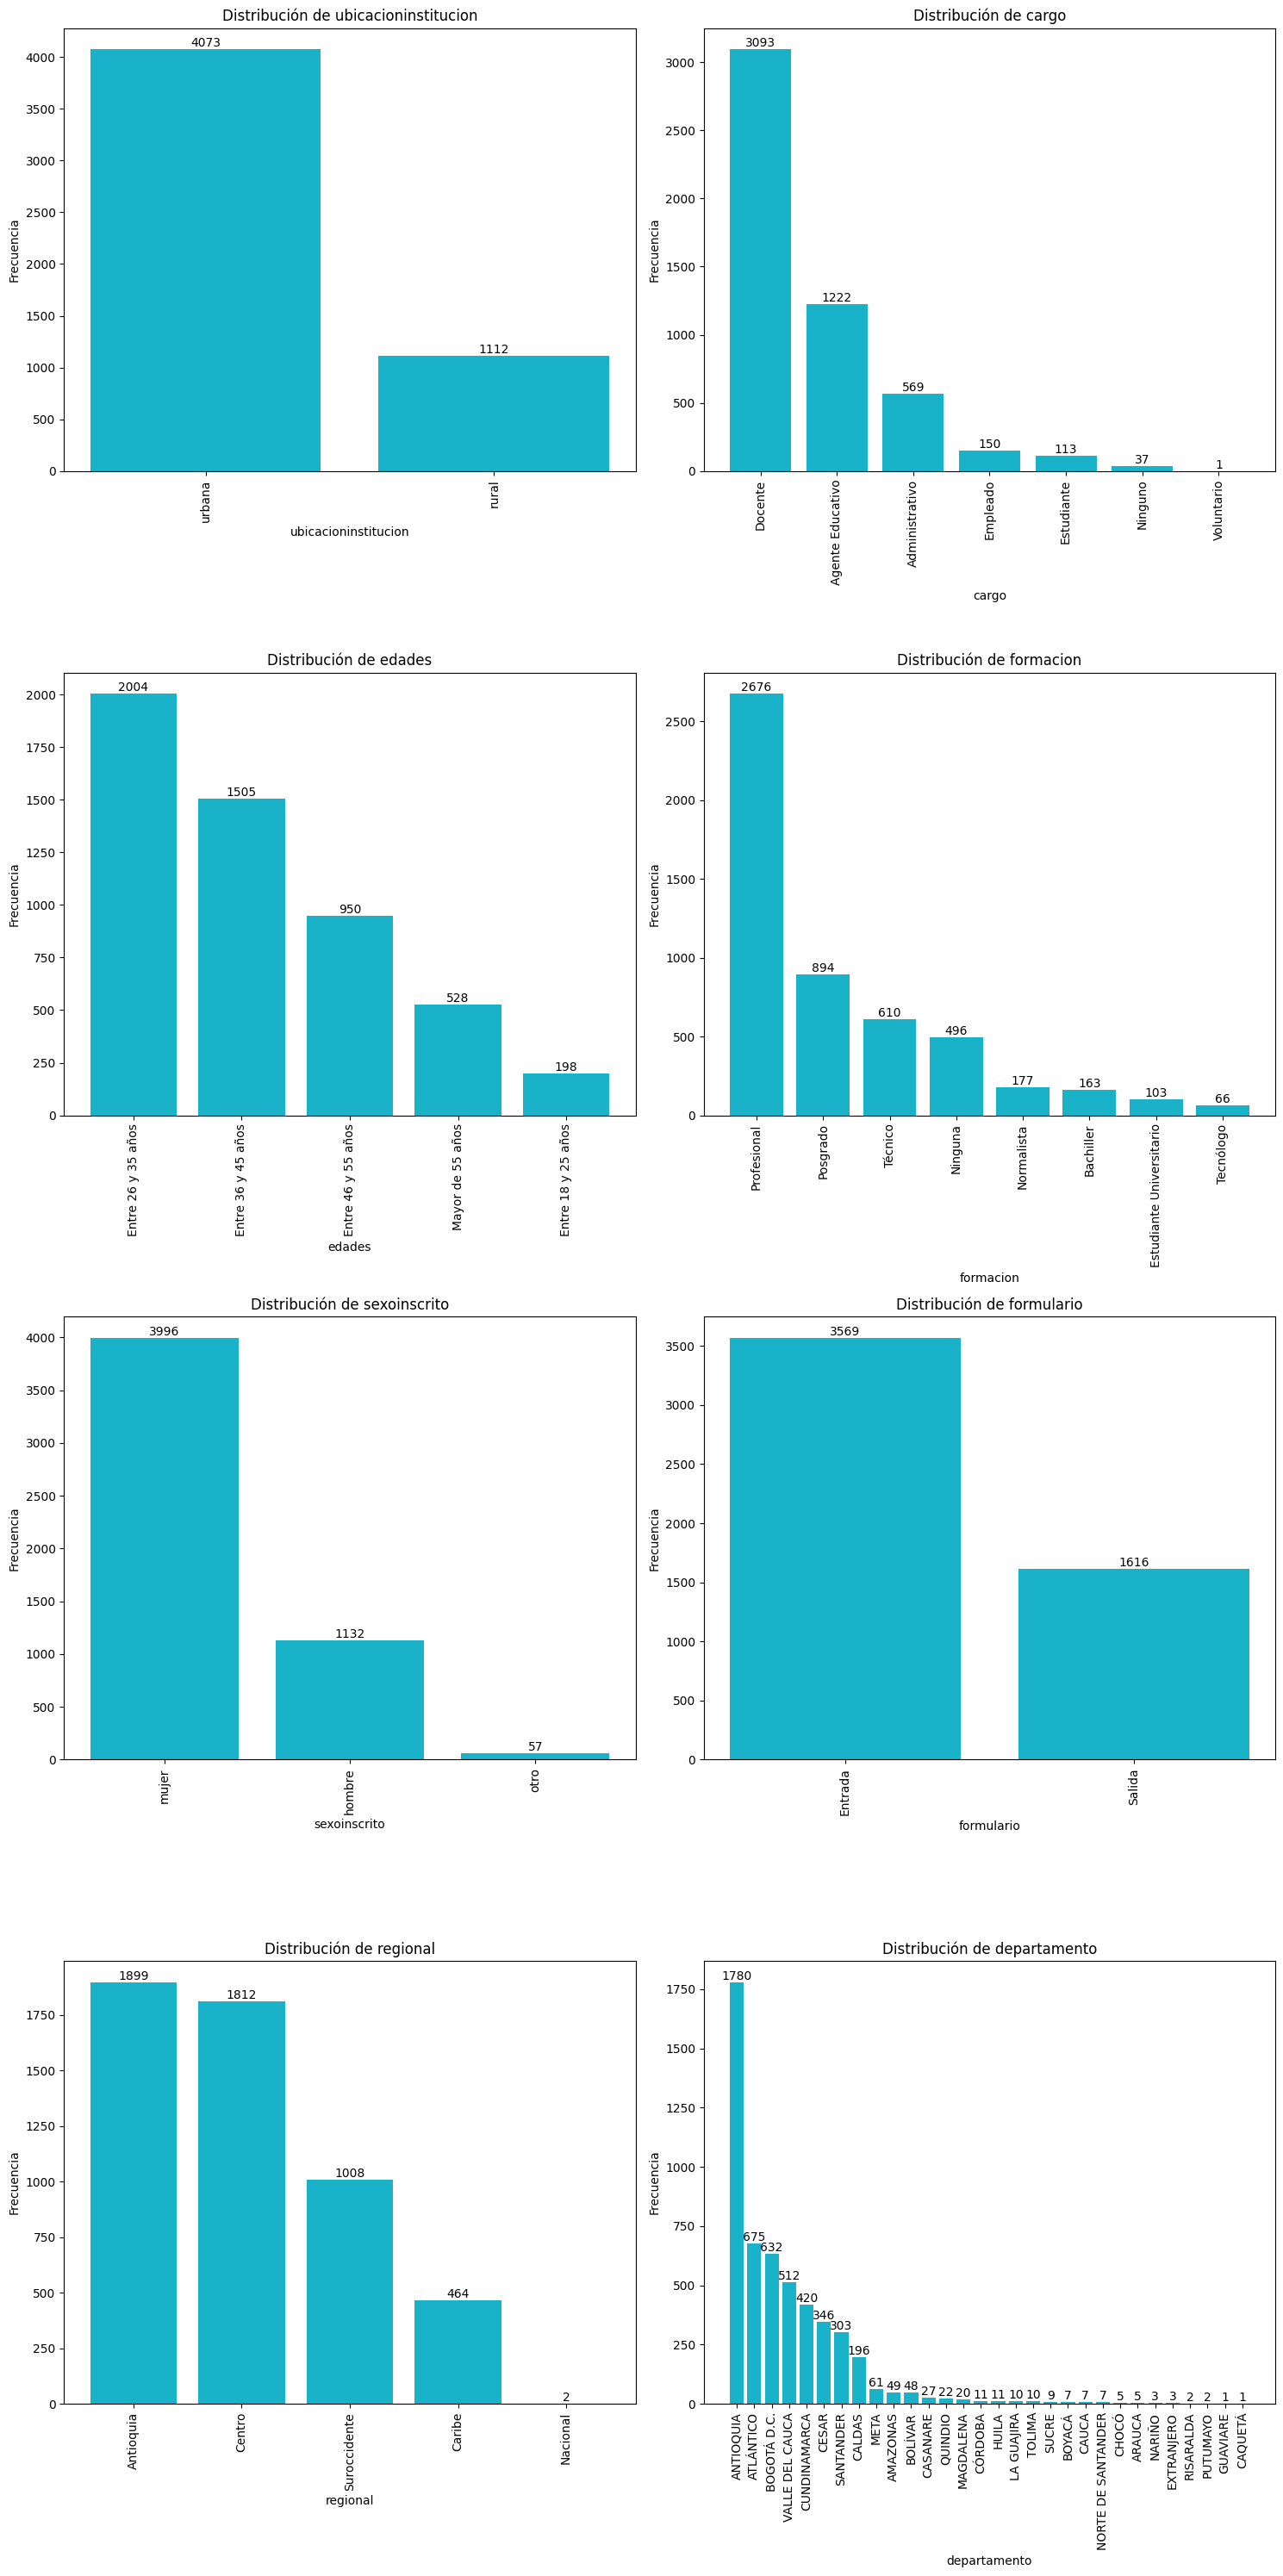

In [13]:
# Variables categóricas
categorical_variables = [
    "ubicacioninstitucion",
    "cargo",
    "edades",
    "formacion",
    "sexoinscrito",
    "formulario",
    "regional",
    "departamento",
]

# Configura un diseño de cuadrícula para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30)) #3 filas 3 columnas
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Espaciado entre los gráficos

# Itera a través de las variables categóricas y crea gráficos de barras
for i, variable in enumerate(categorical_variables):
    row, col = i // 2, i % 2  # Calcula la fila y columna actual
    ax = axes[row, col]  # Obtén el eje actual

    # Cuenta las ocurrencias de cada categoría y crea un gráfico de barras
    counts = data_imputado[variable].value_counts()
    ax.bar(counts.index, counts.values, color="#19b2c8")
    ax.set_title(f"Distribución de {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(
        axis="x", rotation=90
    )  # Rotar etiquetas del eje x para mejorar la legibilidad

    # Agrega etiquetas de datos en las barras
    for j, v in enumerate(counts.values):
        ax.text(j, v, str(v), ha="center", va="bottom")


# Ajusta automáticamente los márgenes
plt.tight_layout()
plt.show()

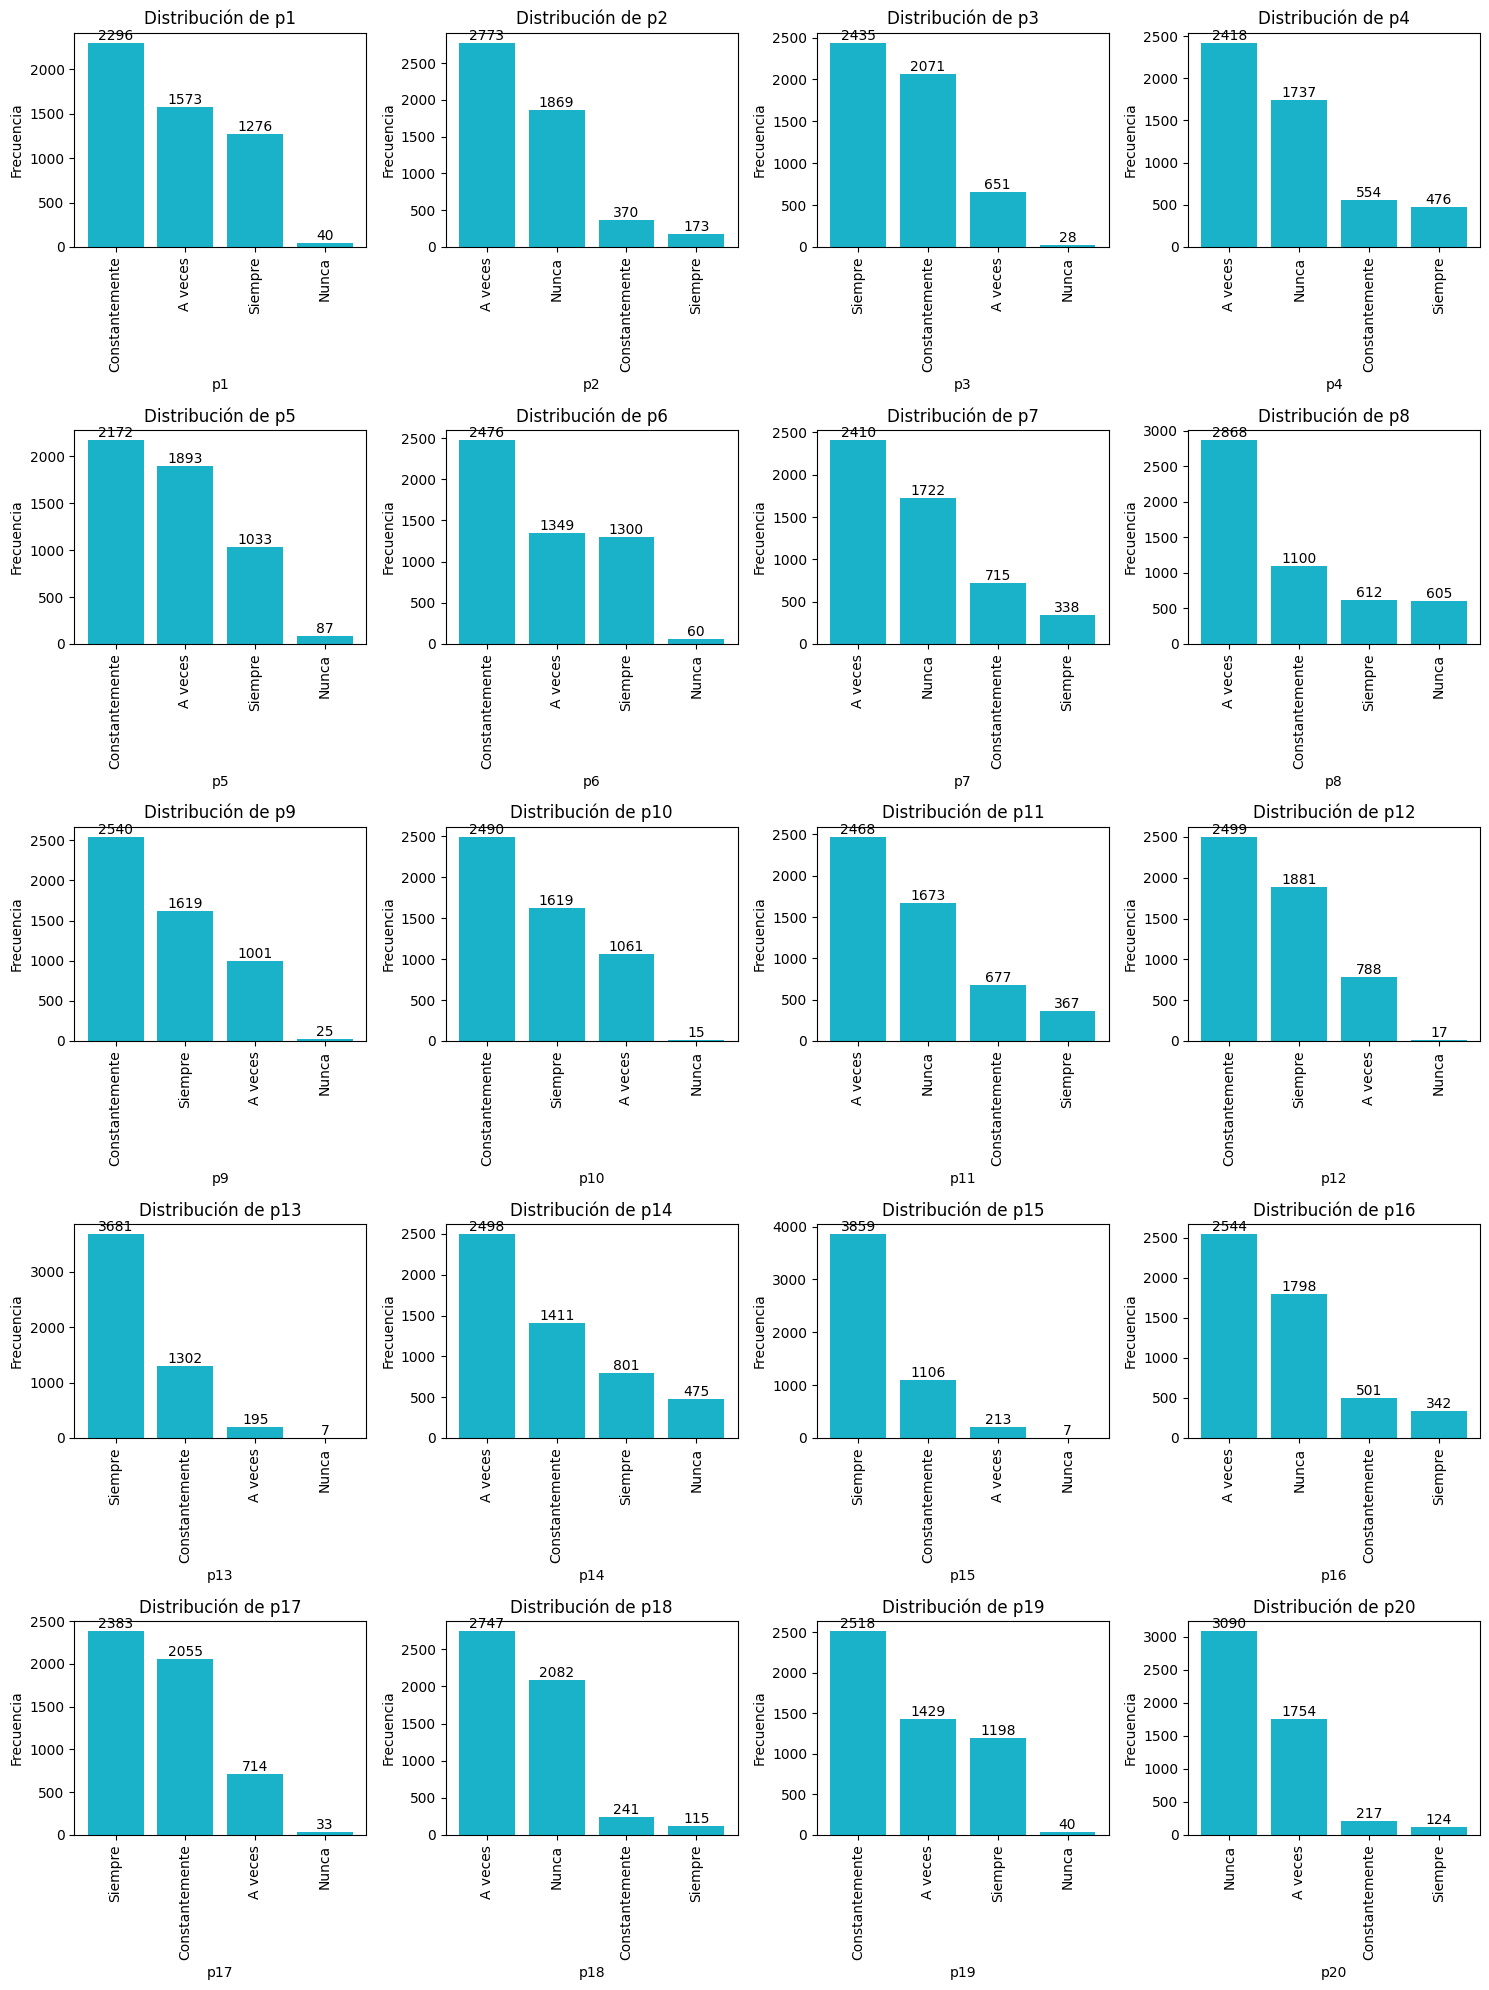

In [14]:
# Variables p1 a p20
variables_p = [
    "p1",
    "p2",
    "p3",
    "p4",
    "p5",
    "p6",
    "p7",
    "p8",
    "p9",
    "p10",
    "p11",
    "p12",
    "p13",
    "p14",
    "p15",
    "p16",
    "p17",
    "p18",
    "p19",
    "p20",
]

# Definir el orden personalizado de las respuestas
orden = ["Nunca", "A veces", "Constantemente", "Siempre"]


# Configura un diseño de cuadrícula para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))  # 3 filas 3 columnas
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Espaciado entre los gráficos

# Itera a través de las variables categóricas y crea gráficos de barras
for i, variable in enumerate(variables_p):
    row, col = i // 4, i % 4  # Calcula la fila y columna actual
    ax = axes[row, col]  # Obtén el eje actual

    # Cuenta las ocurrencias de cada categoría y crea un gráfico de barras
    counts = data_imputado[variable].value_counts()
    ax.bar(counts.index, counts.values, color="#19b2c8")
    ax.set_title(f"Distribución de {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(
        axis="x", rotation=90
    )  # Rotar etiquetas del eje x para mejorar la legibilidad

    # Agrega etiquetas de datos en las barras
    for j, v in enumerate(counts.values):
        ax.text(j, v, str(v), ha="center", va="bottom")


# Ajusta automáticamente los márgenes
plt.tight_layout()
plt.show()

In [15]:
# Mapear las respuestas a los valores numéricos
mapeo_respuestas = {
    "Nunca": 1,
    "A veces": 2,
    "Constantemente": 3,
    "Siempre": 4
}

# Variables p1 a p20
variables_p = ['p1', 'p2', 'p3', 'p4', #Creatividad e innovación
               'p5', 'p6', 'p7', 'p8', # Resolucion de problemas
               'p9', 'p10', 'p11', 'p12', # Pensamiento critico
               'p13', 'p14', 'p15', 'p16', # Trabajo colaborativo
               'p17', 'p18', 'p19', 'p20'] # Comunicación

# Aplicar el mapeo a las columnas correspondientes
for variable in variables_p:
    data_imputado[variable] = data_imputado[variable].replace(mapeo_respuestas)

In [16]:
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,3,3,3,3,4,2,4,3,3,1
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,3,4,3,3,4,2,2,1,2,1
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,3,4,4,2,4,2,4,1,4,1
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,1,4,4,2,2,1,4,2,3,1
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,1,3,4,2,4,2,4,1,4,1


Se hace la codificación y se encuentra que el instrumento tiene preguntas inversas/negativas donde la opción `Nunca` es **Siempre**, `A veces` es **Constantemente**, `Constantemente` es **A veces**, y `Siempre` es **Nunca**.

Se procede a invertir estas 9 preguntas.

In [17]:
# Variables que deben invertirse
variables_invertir = ["p2", "p4", "p7", "p8", "p11", "p14", "p16", "p18", "p20"]

# Invertir las respuestas en las columnas seleccionadas
for variable in variables_invertir:
    data_imputado[variable] = 5 - data_imputado[variable]  # esto "invierte" los alores

In [18]:
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,2,3,3,2,4,3,4,2,3,4
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,2,4,3,2,4,3,2,4,2,4
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,2,4,4,3,4,3,4,4,4,4
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,4,4,4,3,2,4,4,3,3,4
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,4,3,4,3,4,3,4,4,4,4


# Verificar calidad del dato para evidenciar patrones en las respuestas

In [19]:
# Selecciona las columnas que contienen las respuestas de los docentes (p1 a p20)
respuestas = data_imputado.iloc[:, 13:33]

# Identifica respuestas constantes por docente
respuestas_constantes = respuestas.apply(pd.Series.nunique, axis=1) == 1

# Identifica patrones en zigzag por docente
patron_zigzag = ((respuestas.diff(axis=1).abs() == 1) & (respuestas.diff(axis=1).notnull())).all(axis=1)

# Marca 'Constante' en la columna 'Patron_Respuesta' si todas las respuestas son iguales
data_imputado.loc[respuestas_constantes, 'Patron_Respuesta'] = 'Constante'

# Marca 'Zigzag' en la columna 'Patron_Respuesta' si hay un patrón de zigzag en las respuestas
data_imputado.loc[patron_zigzag, 'Patron_Respuesta'] = 'Zigzag'

In [20]:
display(data_imputado[data_imputado['Patron_Respuesta'] == 'Constante'].iloc[:, 13:33])
display(data_imputado[data_imputado['Patron_Respuesta'] == 'Zigzag'].iloc[:, 13:33])

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
166,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
525,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1195,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2890,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2957,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2958,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3055,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20


Hay 7 docentes que diligenciaron la misma respuesta en todas las preguntas, por lo que se procede a eliminar por problemas de calidad de la información.

In [21]:
data_imputado = data_imputado[data_imputado['Patron_Respuesta'] != 'Constante']
data_imputado.shape

(5178, 34)

## Validar que un mismo docente no tenga mas de una prueba en menos de 4 meses que dura la intervención minima de un proyecto

In [22]:
from datetime import datetime

# Asegúrate de que 'Marca temporal' sea del tipo datetime, si no lo es, conviértela
data_imputado['Marca temporal'] = pd.to_datetime(data_imputado['Marca temporal'])

# Ordenar el DataFrame por 'ID' y 'Marca temporal'
data_imputado = data_imputado.sort_values(by=['ID', 'Marca temporal'])

# Identificar pruebas realizadas por el mismo docente con menos de 6 meses de diferencia
data_imputado['Diferencia_meses'] = data_imputado.groupby('ID')['Marca temporal'].diff().dt.days // 30

# Ver una tabla de frecuencias 
data_imputado['Diferencia_meses'].value_counts().reset_index().sort_values(by='index')

,index,Diferencia_meses
3,0.0,148
2,1.0,225
6,2.0,71
0,3.0,268
5,4.0,95
4,5.0,143
1,6.0,226
7,7.0,59
9,8.0,29
8,9.0,33


In [23]:
# Encuentra los índices de los registros que deben ser excluidos
indices_a_eliminar = data_imputado[(data_imputado['Diferencia_meses'].lt(4) & data_imputado['Diferencia_meses'].ge(0))].index

# Elimina los registros identificados del DataFrame original
data_imputado = data_imputado.drop(indices_a_eliminar)
data_imputado.shape

(4466, 35)

Se eliminan aquellos con menos de 4 meses de diferencia entre la aplicación de una prueba y otra.

In [24]:
data_imputado = data_imputado.drop(columns='Diferencia_meses')

## Obtener puntajes y niveles

In [25]:
# Calcular el promedio de las respuestas para cada persona a nivel general y por competencia
data_imputado["puntaje"] = data_imputado.iloc[:, 13:33].mean(axis=1)  # puntaje general
data_imputado["puntaje_creatividad"] = data_imputado.iloc[:, 13:17].mean(
    axis=1
)  # crestividad e innovación
data_imputado["puntaje_resolucion"] = data_imputado.iloc[:, 17:21].mean(
    axis=1
)  # resolucion de problemas
data_imputado["puntaje_pensamiento"] = data_imputado.iloc[:, 21:25].mean(
    axis=1
)  # pensamiento critico
data_imputado["puntaje_trabajocolab"] = data_imputado.iloc[:, 25:29].mean(
    axis=1
)  # trabajo colaborativo
data_imputado["puntaje_comunicacion"] = data_imputado.iloc[:, 29:33].mean(
    axis=1
)  # comunicacion##

In [26]:
data_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
p1,4466.0,2.912450,0.761440,1.00,2.00,3.00,3.00,4.00
p2,4466.0,3.222123,0.714849,1.00,3.00,3.00,4.00,4.00
p3,4466.0,3.331169,0.714464,1.00,3.00,3.00,4.00,4.00
p4,4466.0,3.028661,0.906902,1.00,3.00,3.00,4.00,4.00
p5,4466.0,2.787282,0.770381,1.00,2.00,3.00,3.00,4.00
p6,4466.0,2.952306,0.751980,1.00,2.00,3.00,3.00,4.00
p7,4466.0,3.055307,0.855696,1.00,3.00,3.00,4.00,4.00
p8,4466.0,2.659651,0.833330,1.00,2.00,3.00,3.00,4.00
p9,4466.0,3.098074,0.715693,1.00,3.00,3.00,4.00,4.00
p10,4466.0,3.091133,0.724535,1.00,3.00,3.00,4.00,4.00


In [27]:
intervalos = [0, 2, 3, 4]  # Definimos los intervalos
etiquetas = ["Bajo", "Medio", "Alto"]  # Etiquetas para los niveles

# Utilizar pd.cut para asignar niveles
data_imputado["nivel_general"] = pd.cut(
    data_imputado["puntaje"], bins=intervalos, labels=etiquetas
)
data_imputado["nivel_creatividad"] = pd.cut(
    data_imputado["puntaje_creatividad"], bins=intervalos, labels=etiquetas
)
data_imputado["nivel_resolucion"] = pd.cut(
    data_imputado["puntaje_resolucion"], bins=intervalos, labels=etiquetas
)
data_imputado["nivel_pensamiento"] = pd.cut(
    data_imputado["puntaje_pensamiento"], bins=intervalos, labels=etiquetas
)
data_imputado["nivel_trabajocolab"] = pd.cut(
    data_imputado["puntaje_trabajocolab"], bins=intervalos, labels=etiquetas
)
data_imputado["nivel_comunicacion"] = pd.cut(
    data_imputado["puntaje_comunicacion"], bins=intervalos, labels=etiquetas
)

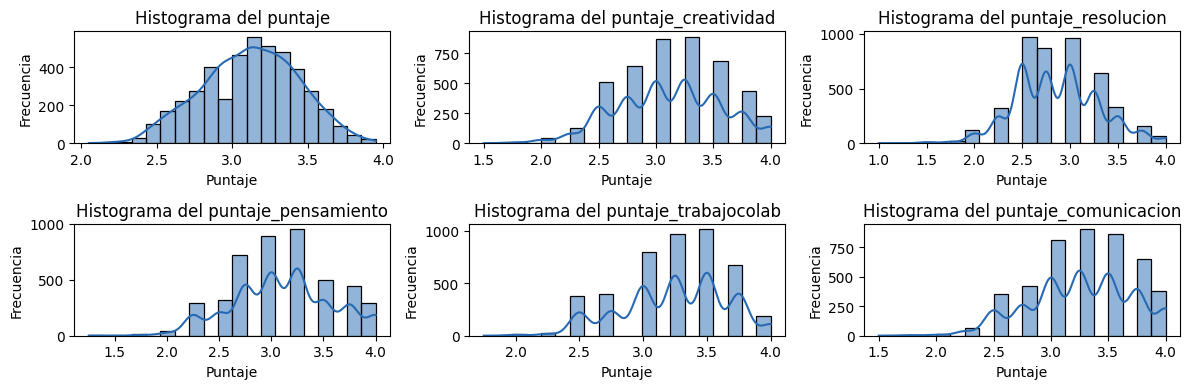

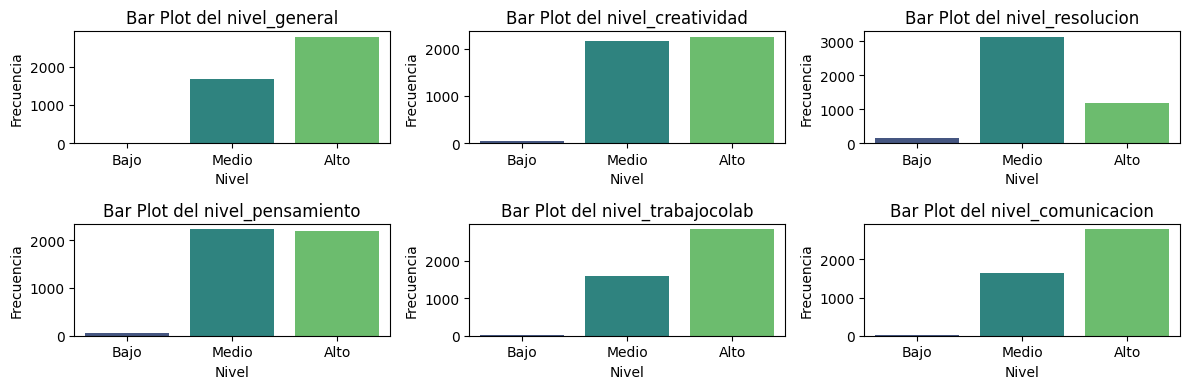

In [28]:
# Crear hist plots para cada puntaje
puntajes = [
    "puntaje",
    "puntaje_creatividad",
    "puntaje_resolucion",
    "puntaje_pensamiento",
    "puntaje_trabajocolab",
    "puntaje_comunicacion",
]

plt.figure(figsize=(12, 4))
for i, puntajes_ in enumerate(puntajes):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=data_imputado[puntajes_], bins=20, kde=True, color="#276ab3")
    plt.title(f"Histograma del {puntajes_}")
    plt.xlabel("Puntaje")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Crear bar plots para cada nivel
niveles = [
    "nivel_general",
    "nivel_creatividad",
    "nivel_resolucion",
    "nivel_pensamiento",
    "nivel_trabajocolab",
    "nivel_comunicacion",
]

plt.figure(figsize=(12, 4))
for i, nivel in enumerate(niveles):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=data_imputado, x=nivel, order=etiquetas, palette="viridis")
    plt.title(f"Bar Plot del {nivel}")
    plt.xlabel("Nivel")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Se observa que casi no existen (o no hay) elementos en el nivel bajo. Por tanto, se procede a "eliminar" este nivel uniendolo con el nivel Medio. Por coherencia, se llamara al nuevo nivel "bajo":

In [29]:
niveles = [col for col in data_imputado.columns if "nivel" in col]

for col in niveles:
    data_imputado[col] = data_imputado[col].apply(lambda x: str(x).replace("Medio", "Bajo"))

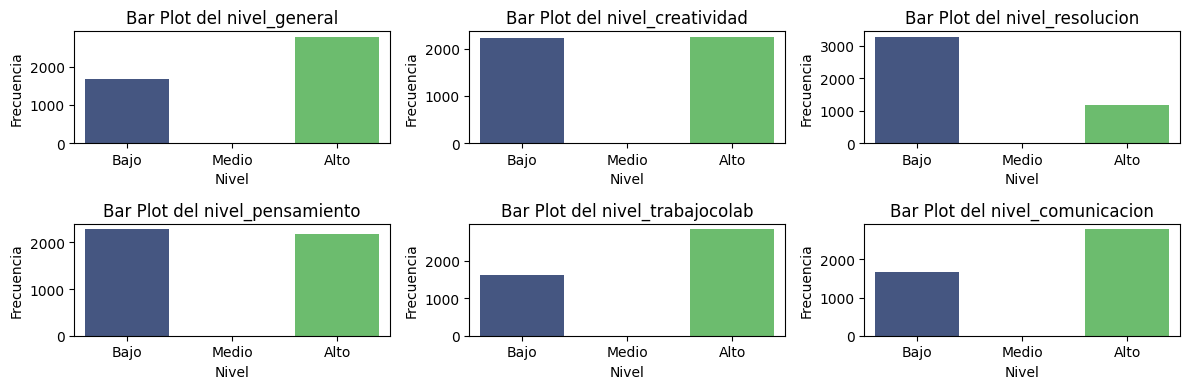

In [30]:
plt.figure(figsize=(12, 4))
for i, nivel in enumerate(niveles):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=data_imputado, x=nivel, order=etiquetas, palette="viridis")
    plt.title(f"Bar Plot del {nivel}")
    plt.xlabel("Nivel")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [31]:
## Calculando la consistencia interna
p_general = data_imputado.iloc[:, 13:33]
p_creatividad = data_imputado.iloc[:, 13:17]
p_resolucion = data_imputado.iloc[:, 17:21]
p_pensamiento = data_imputado.iloc[:, 21:25]
p_trabajocolab = data_imputado.iloc[:, 25:29]
p_comunicacion = data_imputado.iloc[:, 29:33]

# Calcular el coeficiente de confiabilidad de Cronbach
alpha_p_general = pg.cronbach_alpha(data=p_general)
alpha_p_creatividad = pg.cronbach_alpha(data=p_creatividad)
alpha_p_resolucion = pg.cronbach_alpha(data=p_resolucion)
alpha_p_pensamiento = pg.cronbach_alpha(data=p_pensamiento)
alpha_p_trabajocolab = pg.cronbach_alpha(data=p_trabajocolab)
alpha_p_comunicacion = pg.cronbach_alpha(data=p_comunicacion)

# Imprimir el valor de Cronbach's alpha
print("Cronbach's Alpha general:", alpha_p_general)
print("Cronbach's Alpha creatividad:", alpha_p_creatividad)
print("Cronbach's Alpha resolucion:", alpha_p_resolucion)
print("Cronbach's Alpha pensamiento critico:", alpha_p_pensamiento)
print("Cronbach's Alpha trabajo colaborativo:", alpha_p_trabajocolab)
print("Cronbach's Alpha comunicacion:", alpha_p_comunicacion)

Cronbach's Alpha general: (0.758686218911147, array([0.748, 0.769]))
Cronbach's Alpha creatividad: (0.3767615613510156, array([0.346, 0.406]))
Cronbach's Alpha resolucion: (0.19658473153998007, array([0.157, 0.234]))
Cronbach's Alpha pensamiento critico: (0.5156314043881565, array([0.492, 0.538]))
Cronbach's Alpha trabajo colaborativo: (0.3372725454537571, array([0.305, 0.368]))
Cronbach's Alpha comunicacion: (0.508283070118301, array([0.484, 0.531]))


Para garantizar la confiabilidad de los resultados obtenidos en el instrumento de Perfilación de Competencias del Siglo XXI, se aplicó el coeficiente alfa de Cronbach, una prueba utilizada para evaluar la consistencia interna de las preguntas. Se obtuvo un valor general de Alpha de 0,726 lo que indica una confiabilidad buena. Los ítems de la escala están razonablemente correlacionados y la medida es considerada confiable para su uso en la mayoría de los casos.

Sin embargo, las preguntas que miden cada competencia no son consistentes, tienen una baja confiabilidad, lo que implica que no parece ser la mejor manera de agruparlas.

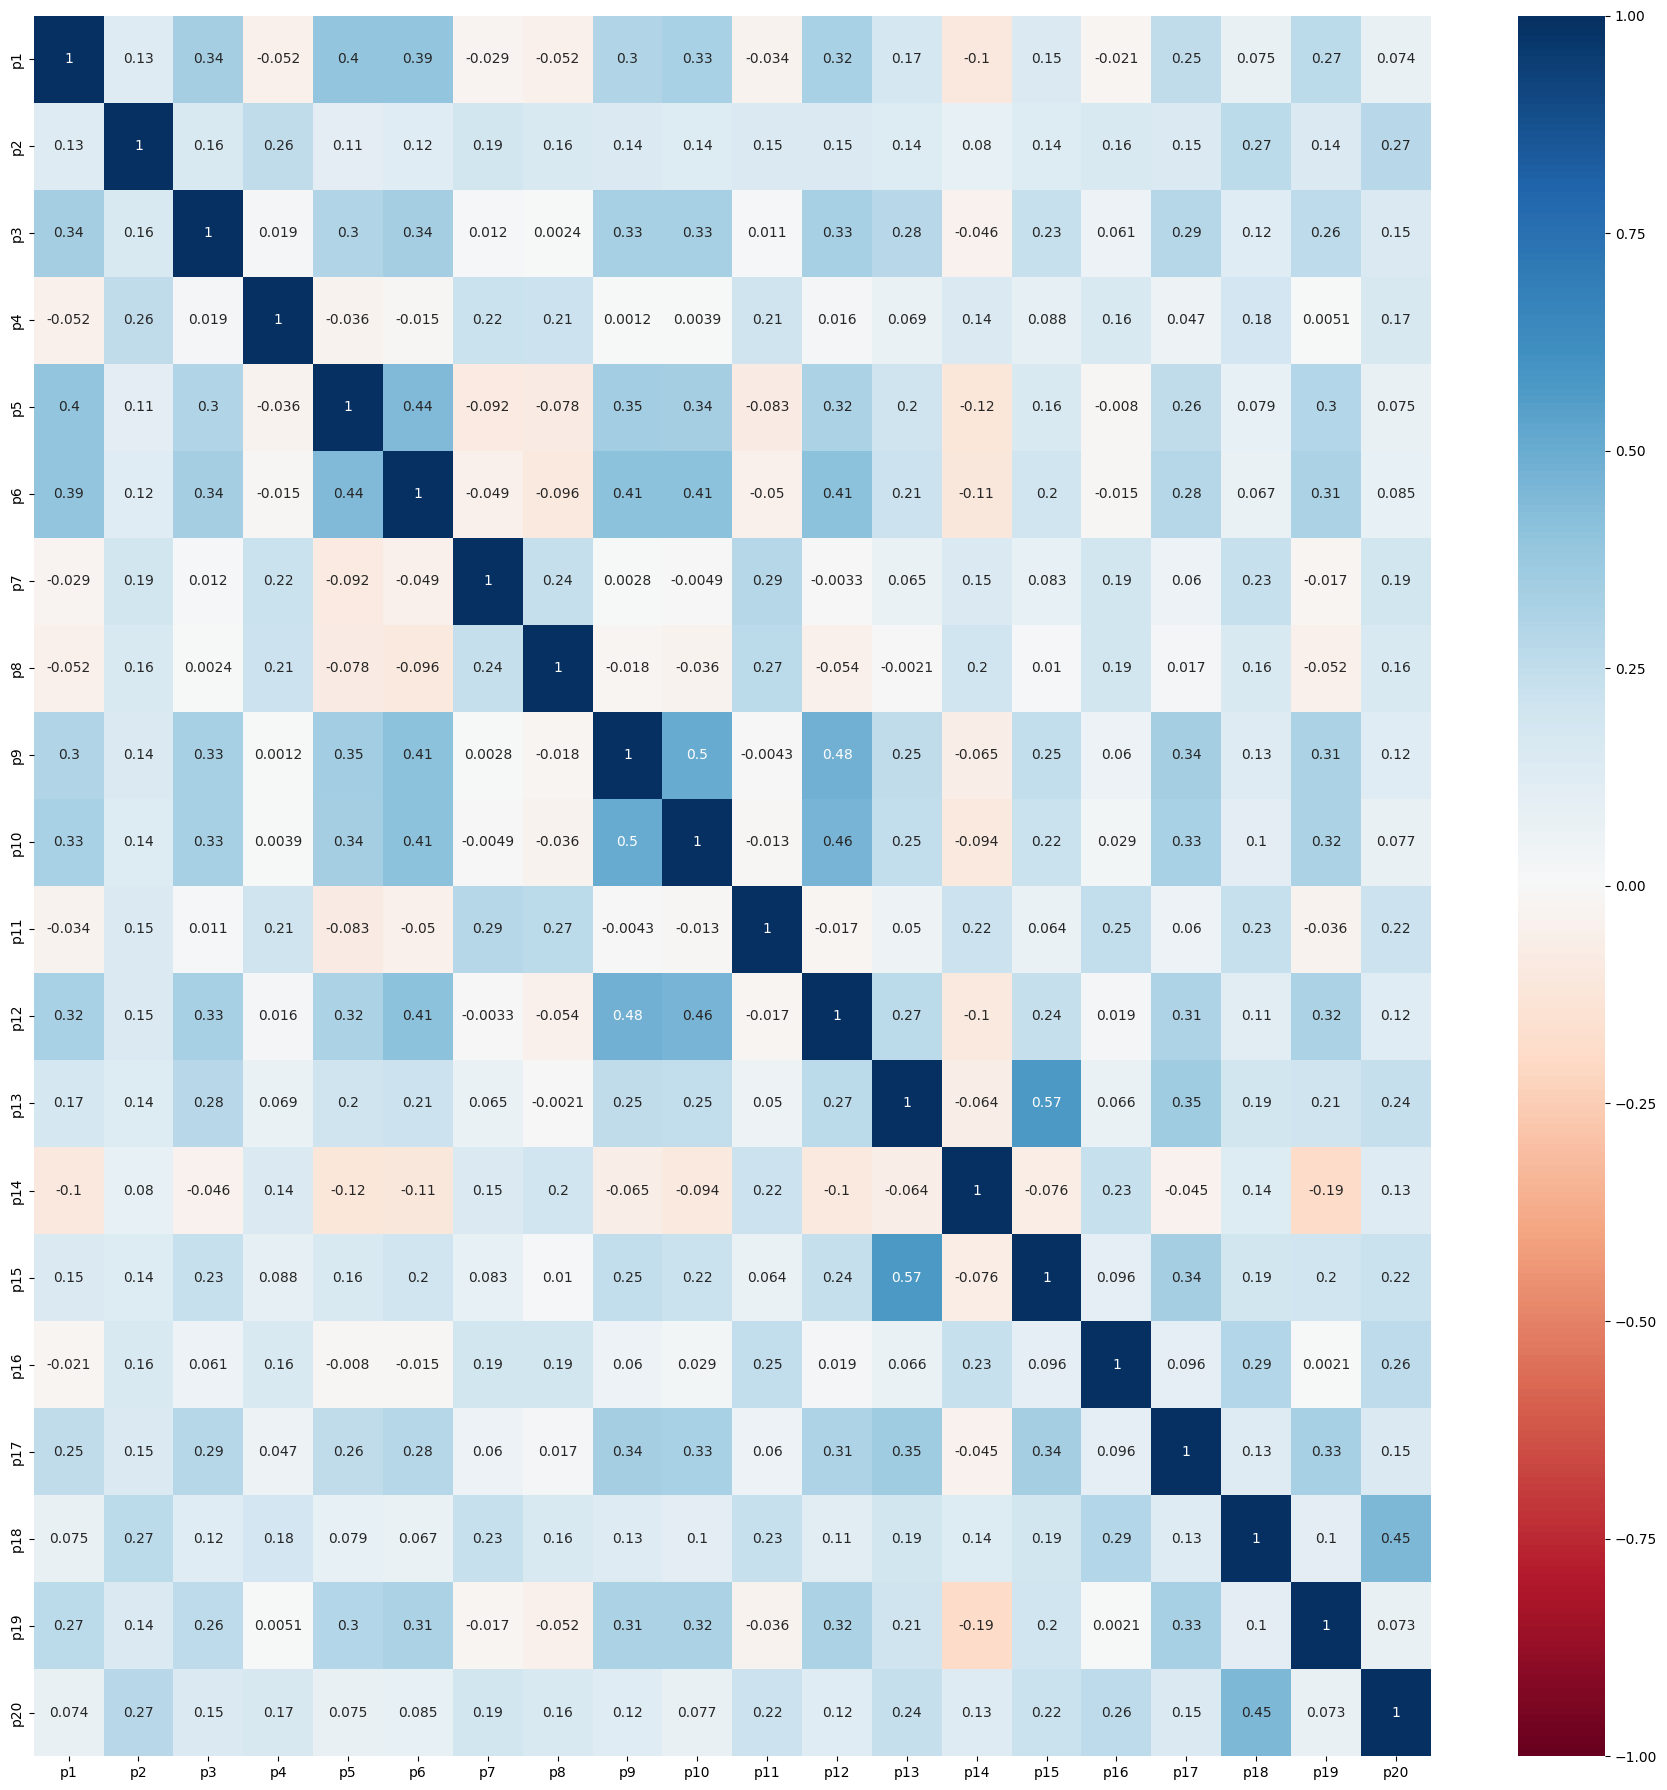

In [32]:
fig = plt.figure(figsize=(18, 18))
sns.heatmap(
    data_imputado.iloc[:, 13:33].corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True
)
plt.tight_layout()
plt.show()

No se logra identificar una correlación alta entre las variables, lo que es bueno porque queremos evitar redundancia de variables. Incluso entre las preguntas que constituyen una competencia tampoco se encuentra alta correlación.

The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix)

Ahora, se usa el predictive power score (https://github.com/8080labs/ppscore) para validar la interacción entre los diferentes valores de los datos. Este es un indicador asimétrico, agnostico al tipo de dato que mide relaciones lineales o no lineales entre columnas. Esta medida del poder predictivo entre los datos va de 0 (no hay poder predictivo) a 1 (predice perfectamente). Se genera la tabla con los datos de interés explorados anteriormente (variables categóricas de interes incluyendo los niveles, variables asociadas a las preguntas)

In [33]:
matrix_df = pps.matrix(data_imputado[[*categorical_variables, *niveles, *variables_p]])[
    ["x", "y", "ppscore"]
].pivot(columns="x", index="y", values="ppscore")

<Axes: xlabel='x', ylabel='y'>

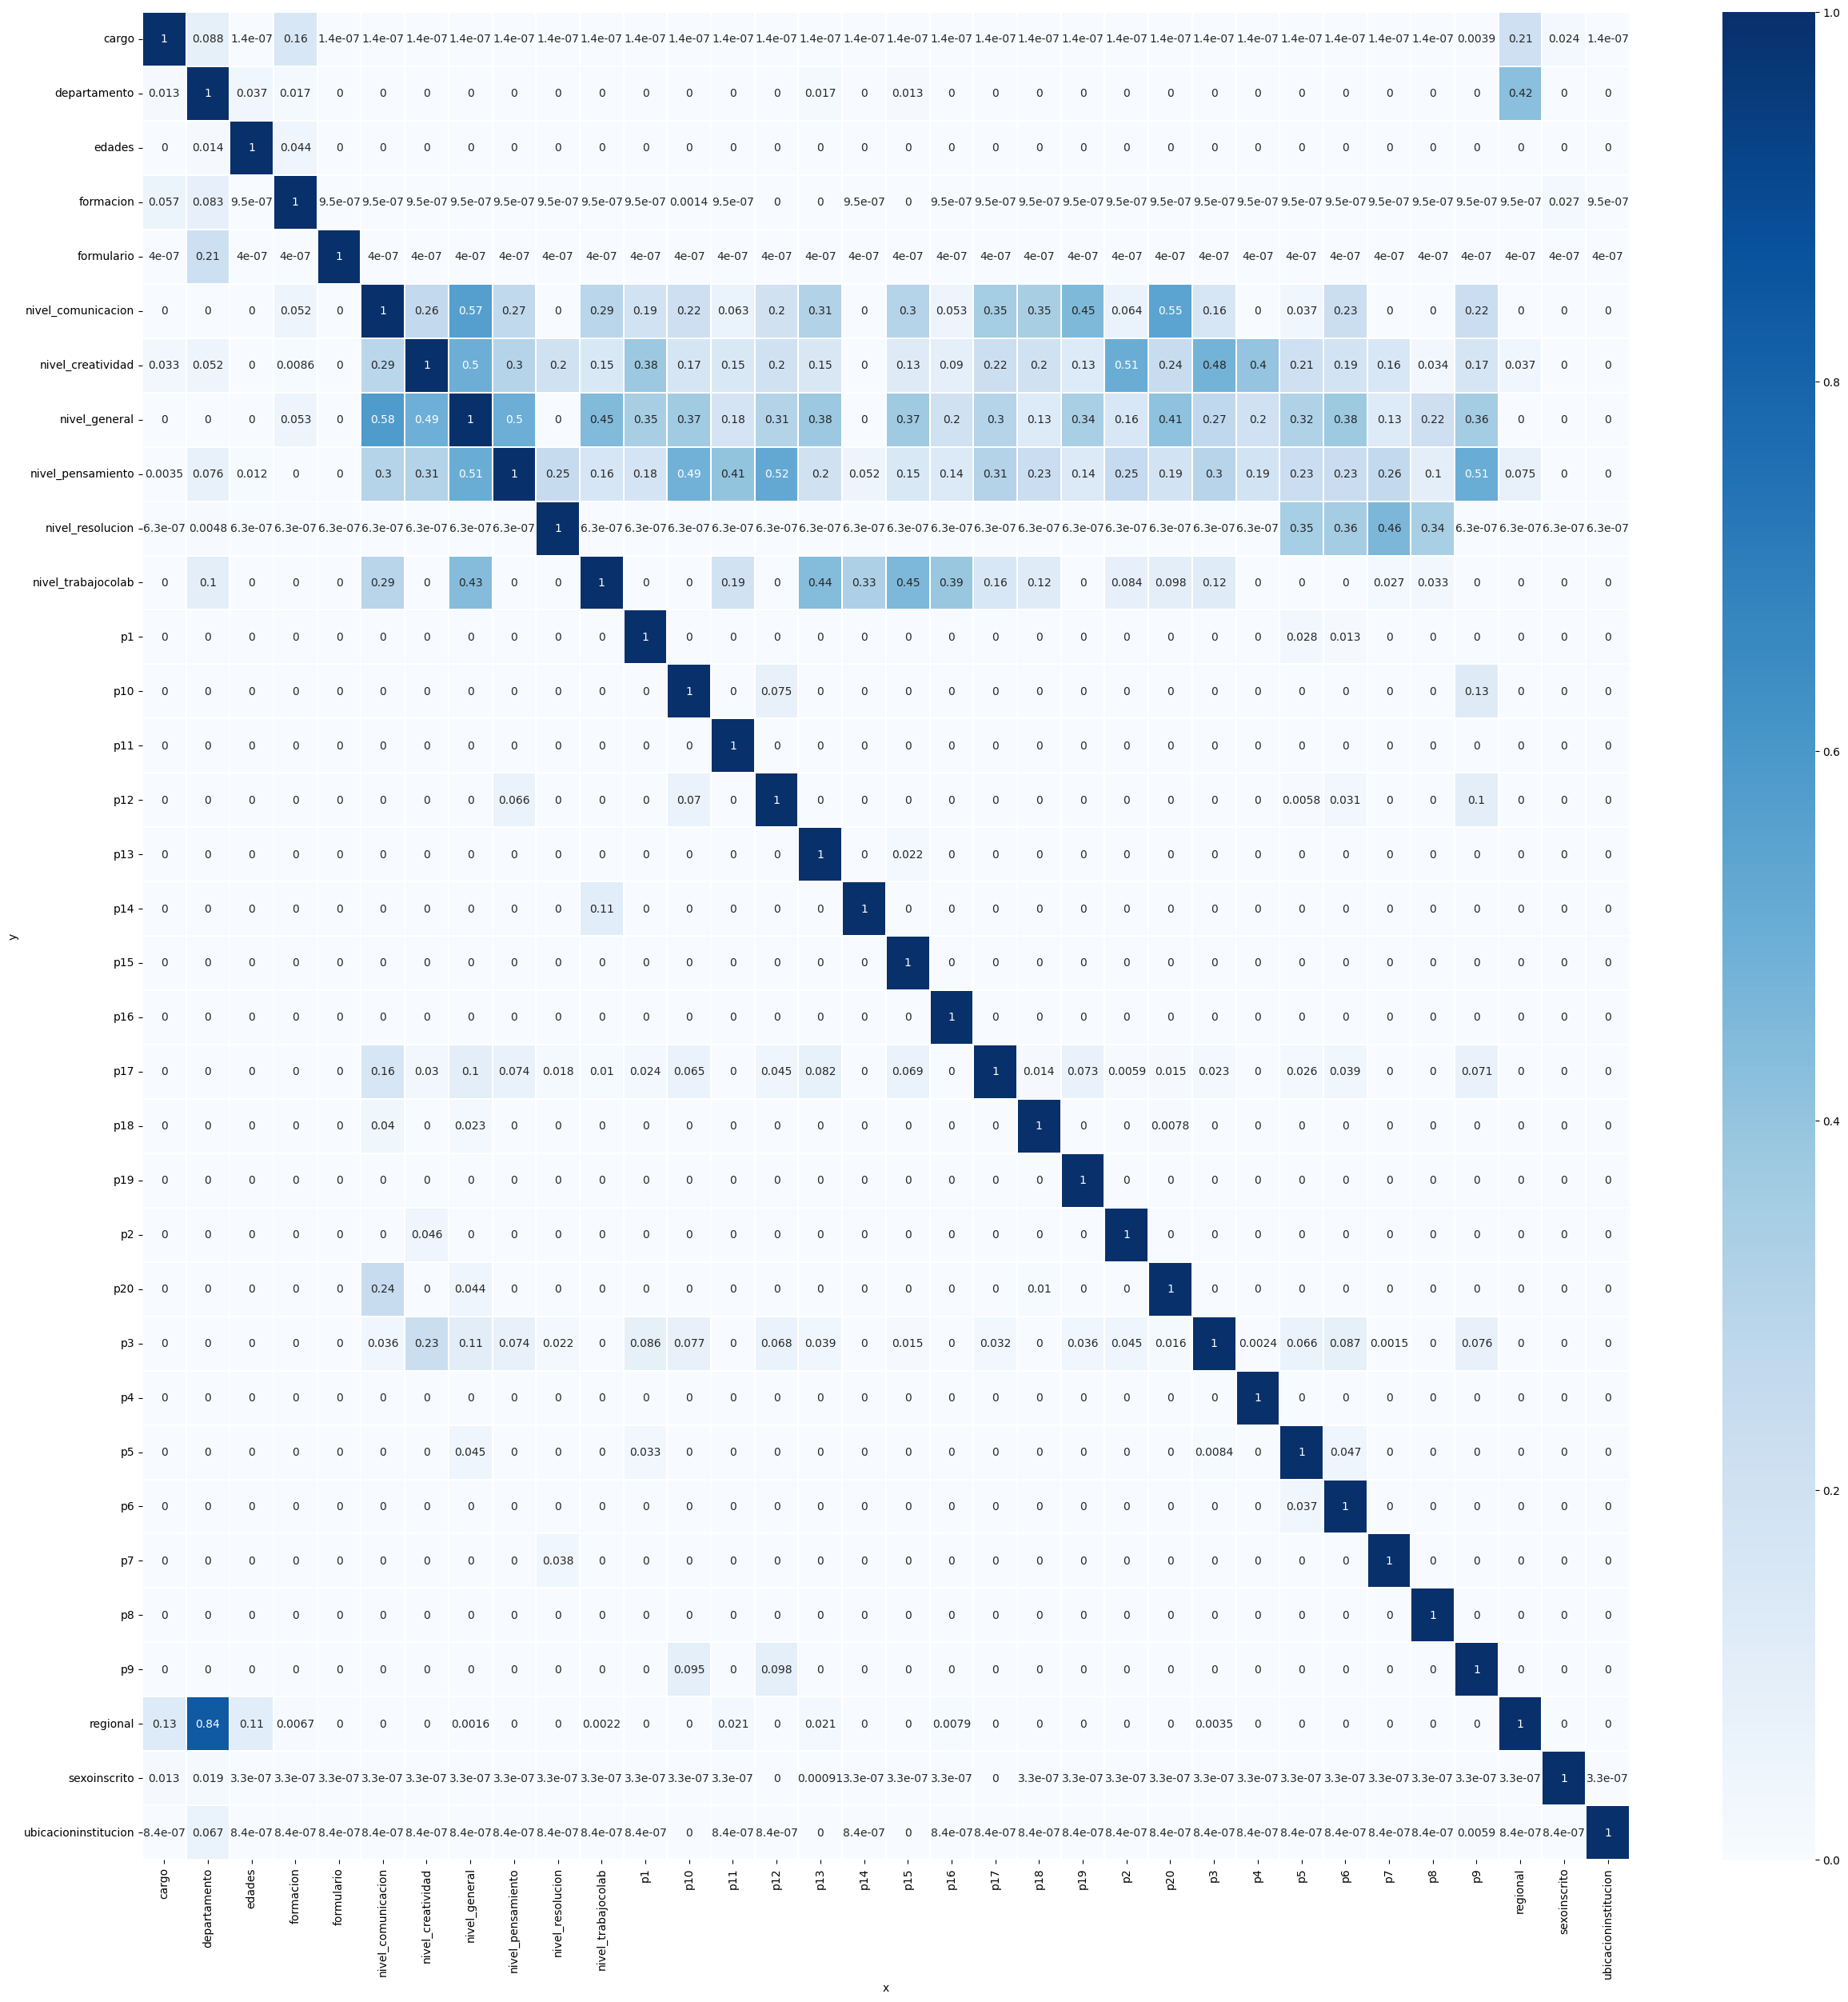

In [34]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.2, annot=True)

Se observan algunas relaciones de interés. Un ejemplo de cómo leer la grafica es observando la fila de nivel_trabajocolab

<Axes: xlabel='x'>

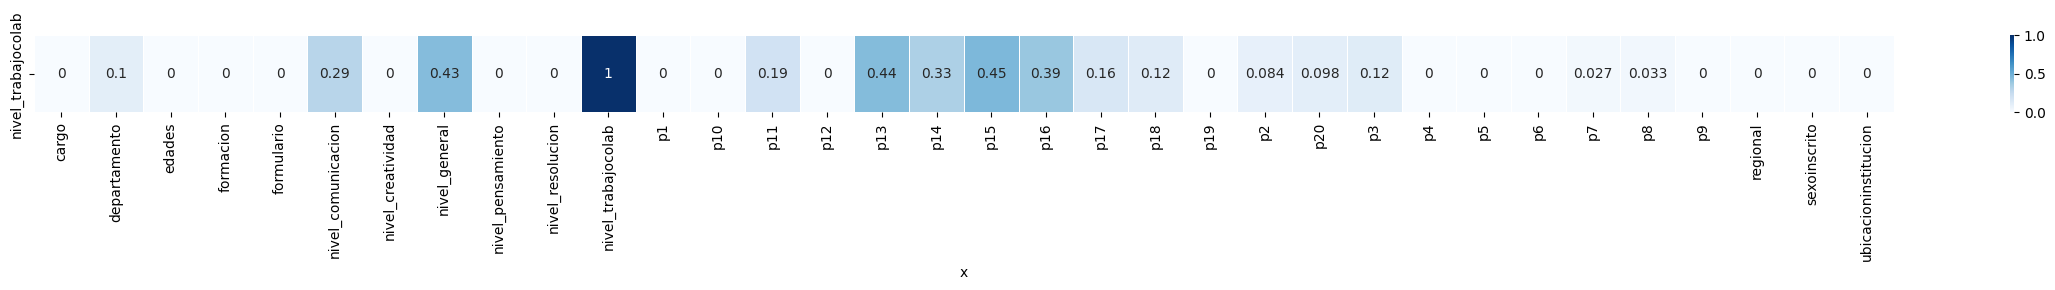

In [35]:
fig = plt.figure(figsize=(30, 1))

sns.heatmap(
    pd.DataFrame(matrix_df.T["nivel_trabajocolab"].T).T,
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
)

esta fila mide el poder que tienen todas las variables para predecir al nivel de trabajo colaborativo. Por ejemplo, se puede ver que tiene un poder predictivo de 1 consigo mismo. Por otro lado, el nivel de comunicación tiene un 0.28 de poder predictivo. Esta no es una matriz simétrica, por tanto:

<Axes: xlabel='x'>

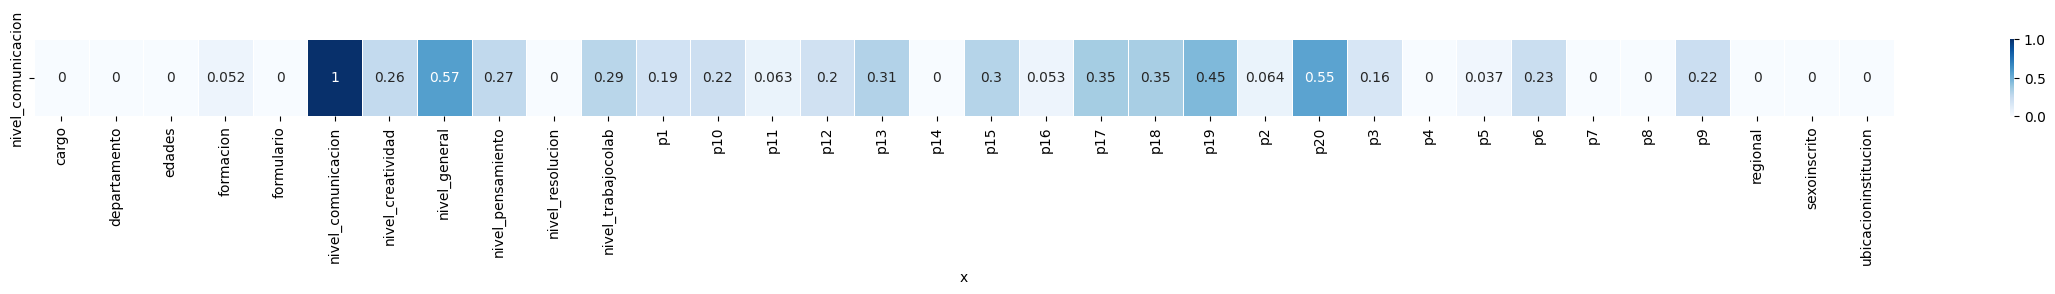

In [36]:
fig = plt.figure(figsize=(30, 1))

sns.heatmap(
    pd.DataFrame(matrix_df.T["nivel_comunicacion"].T).T,
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
)

Al mirar la fila del nivel de comunicación, se ve que el trabajo colaborativo tiene 0.28 de poder predictivo.

Dado todo lo anterior, se observan elementos de interés, tales cómo:

1. Hay preguntas que no influyen mucho en los niveles, cómo la pregunta 14
1. Se esperaba que las preguntas de cada nivel fueran los mejores predictores de cada nivel. Esto no ocurre. Se tienen niveles que dependen de preguntas fuera de su "alcance", y que tienen a ser similares. Por lo anterior, se considera la posibilidad de que haya grupos de conocimiento que deban unirse (por ejemplo, comunicación y trabajo colaborativo). Esto, por los PPS entre los niveles y las preguntas que pueden predecir cada nivel

# Analisis Factorial

Antes de implementar PCA, vamos a realizar un analisis factorial para identificar posibles patrones subyacentes en los datos que expliquen su variabilidad. Para esto primero utilizaremos el test de esfericidad de Bartlett para determinar si existe una estructura de correlación entre las variables observadas que pueda ser explotada mediante técnicas como el análisis factorial.

In [37]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [38]:
'''
Bartlett’s test of sphericity checks whether or not the observed variables
intercorrelate at all using the observed correlation matrix against the identity matrix. 
If the test found statistically insignificant, you should not employ a factor analysis.
'''
chi_square_value,p_value=calculate_bartlett_sphericity(data_imputado.iloc[:, 13:33])
chi_square_value, p_value

(18628.04697169697, 0.0)

El p-value es 0. El test es estadisticamente significativo, lo que indica que la matriz de correlación no es una matriz de identidad y con ello, que es posible identificar factores que expliquen la varianza.

In [39]:
'''
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.
'''

kmo_all,kmo_model=calculate_kmo(data_imputado.iloc[:, 13:33])
kmo_model

0.8745077300164983

El test KMO para nuestros datos es 0.87; este valor indica que podemos proceder con el analisis factorial.

## PCA

Se usará PCA para la reducción de dimensionalidad, decidiendo tomar los componentes que expliquen al menos el 80% de la varianza. Dado el resultado del PPS, se espera que preguntas cómo la 14 no se encuentren en los componentes principales encontrados. Para este proceso, se tomarán solo los resultados a las preguntas, que son las que se consideran que existe posibilidad de reducción de dimensión

In [40]:
# Crea el objeto PCA
pca_model = PCA(n_components=20)

# Ajusta el modelo PCA a tus datos
modelo_pca = pca_model.fit_transform(data_imputado.iloc[:, 13:33]) #tomar las 20 preguntas

# Explora la varianza explicada para determinar la cantidad óptima de componentes
explained_variance = pca_model.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Encuentra el número óptimo de componentes basado en la varianza explicada acumulativa
optimal_n_components = (cumulative_explained_variance <= 0.8).sum()+1   # Por ejemplo, puedes elegir 95% de varianza explicada


# Ajusta el modelo PCA con la cantidad óptima de componentes
pca_model = PCA(n_components=optimal_n_components)
modelo_pca = pca_model.fit_transform(data_imputado.iloc[:, 13:33])

print(f"La cantidad óptima de componentes principales es: {optimal_n_components}")

La cantidad óptima de componentes principales es: 12


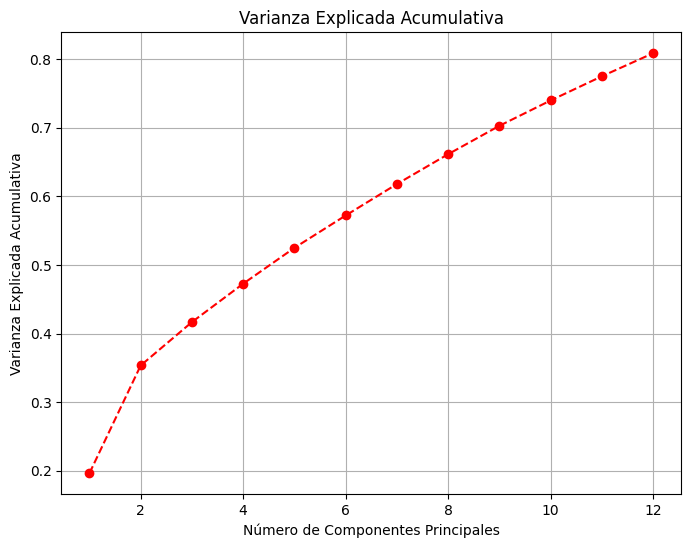

In [41]:
# Calcula la varianza explicada acumulativa
explained_variance = pca_model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    linestyle="--",
    color='red'
)
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulativa")
plt.title("Varianza Explicada Acumulativa")
plt.grid(True)
plt.show()

In [42]:
# Imprime las proporciones de varianza explicada por cada componente principal
explained_variance_ratios = pca_model.explained_variance_ratio_
plus = 0
for i, ratio in enumerate(explained_variance_ratios, 1):
    plus += ratio
    print(
        f"\033[1mComponente {i if len(str(i))>1 else f'0{i}'}\033[0;0m:\
 {ratio:.4f} - acumulada: {plus}"
    )

Componente 01: 0.1965 - acumulada: 0.19654325245096954
Componente 02: 0.1570 - acumulada: 0.35359218522399993
Componente 03: 0.0632 - acumulada: 0.41682711551904483
Componente 04: 0.0559 - acumulada: 0.4727519415077302
Componente 05: 0.0523 - acumulada: 0.5250260887414376
Componente 06: 0.0471 - acumulada: 0.5721678800097392
Componente 07: 0.0458 - acumulada: 0.6179830304587923
Componente 08: 0.0435 - acumulada: 0.6615010467323729
Componente 09: 0.0414 - acumulada: 0.7028711698830945
Componente 10: 0.0370 - acumulada: 0.7398297574963176
Componente 11: 0.0352 - acumulada: 0.7750503528391212
Componente 12: 0.0336 - acumulada: 0.8086698930400038


In [43]:
df = pd.DataFrame(modelo_pca)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.375551,0.061180,-1.370982,0.137046,-0.523451,0.508388,0.581311,-0.868865,-0.237331,-1.163523,0.251097,-0.664539
1,-1.862597,-0.643692,-0.625500,0.344962,-0.032385,-0.601797,1.063245,-1.151504,-0.138076,-0.044222,0.023509,0.367377
2,0.163487,-2.361274,-0.298741,-0.141100,0.513057,0.258075,-0.105044,-1.500369,0.701096,1.240348,-1.004514,0.145231
3,-1.301216,-1.496240,-0.395599,-0.290090,0.323232,-0.449111,-0.513645,-0.604660,-0.163550,-0.105970,-0.467110,0.908751
4,1.930954,0.165720,-1.146989,0.432398,-0.244689,1.020731,-0.502534,0.103912,0.036794,-0.520386,-0.392911,-0.034136
...,...,...,...,...,...,...,...,...,...,...,...,...
4461,2.159443,-1.009659,0.649898,0.161767,-0.662118,0.404911,0.441216,0.527115,0.221731,0.026260,-0.026736,0.323930
4462,-1.598690,1.141149,-0.305392,0.258365,-1.068545,-0.403576,1.288389,-0.880667,-0.216446,0.406735,0.698565,0.059649
4463,1.364712,0.941877,-0.362978,-0.184334,-0.934788,-0.146382,0.368596,-0.291313,0.310462,-0.309093,0.232465,0.909414
4464,-0.739008,-1.354061,-0.896386,-0.470088,0.386749,-0.076551,-0.027414,1.474459,-0.026408,-0.024285,0.103371,-0.558334


Se revisan las preguntas que sean más relevantes para los componentes principales de interés

In [44]:
most_important = [np.abs(pca_model.components_[i]).argmax() for i in range(12)]
initial_feature_names = [f"p{x+1}" for x in list(range(1, 21))]
most_important_names = [initial_feature_names[most_important[i]] for i in range(12)]
dic = {"PC{}".format(i): most_important_names[i] for i in range(12)}
pc_df = pd.DataFrame(
    dic.items(), columns=["Componente Principal", "Pregunta más relevante"]
)
pc_df

,Componente Principal,Pregunta más relevante
0,PC0,p7
1,PC1,p12
2,PC2,p5
3,PC3,p15
4,PC4,p9
5,PC5,p9
6,PC6,p12
7,PC7,p2
8,PC8,p17
9,PC9,p18


Las preguntas que más aportan a explicar la varianza son:

In [45]:
pc_df.iloc[:,1].unique()

array(['p7', 'p12', 'p5', 'p15', 'p9', 'p2', 'p17', 'p18', 'p20', 'p6'],
      dtype=object)

Tal cómo se esperaba, preguntas como la 14 no aparecen en los componentes principales, y las preguntas que si lo hacen son preguntas con alto poder predictivo para los niveles (por ejemplo, la pregunta 20 que tiene un PPS de 0.56 para comunicación)